In [1]:
from ehrdata import OMOP
# Using MIMIC-IV demo data in the OMOP Common Data Model
# Download link: https://physionet.org/content/mimic-iv-demo-omop/0.9/

/opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
omop = OMOP(file_paths="/Users/xinyuezhang/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv")

In [3]:
# Load some tables
adata = omop.load(level='stay_level')

2024-01-04 13:38:37,971 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `852` x `2`.


In [4]:
# think about where to store these statistics

Couldn't find concept [0] in concept table!

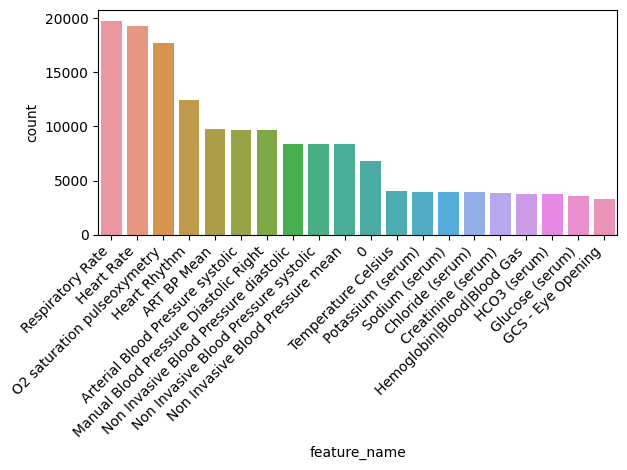

In [4]:
# Explore most frequent n features in measurement table
feature_counts = omop.feature_statistics(source='measurement', number=20)

In [5]:
feature_counts

,feature_name,measurement_concept_id_1,measurement_concept_id_2,count
0,Respiratory Rate,2000030002,3024171,19776
1,Heart Rate,2000030001,3027018,19319
2,O2 saturation pulseoxymetry,2000030003,40762499,17683
3,Heart Rhythm,2000030004,3022318,12441
4,ART BP Mean,2000030096,3027598,9738
5,Arterial Blood Pressure systolic,2000030009,3004249,9661
6,Manual Blood Pressure Diastolic Right,2000030157,3012888,9660
7,Non Invasive Blood Pressure diastolic,2000030006,21492240,8373
8,Non Invasive Blood Pressure systolic,2000030005,21492239,8371
9,Non Invasive Blood Pressure mean,2000030007,21492241,8366


In [ ]:
adata = omop.extract_features(adata, source='measurement', features=[2000030003, 'Respiratory Rate'], map_concept=True, add_aggregation_to_X=False, verbose=True, remove_empty_column=True)

In [7]:
adata

AnnData object with n_obs × n_vars = 852 × 2
    obs: 'preceding_visit_occurrence_id', 'race_source_concept_id', 'discharge_to_concept_id', 'discharge_to_source_value', 'death_datetime', 'visit_concept_id', 'race_source_value', 'gender_source_concept_id', 'cause_source_concept_id', 'cause_concept_id', 'death_type_concept_id', 'provider_id_y', 'care_site_id_y', 'provider_id_x', 'visit_end_date', 'month_of_birth', 'visit_type_concept_id', 'visit_source_concept_id', 'day_of_birth', 'cause_source_value', 'birth_datetime', 'visit_start_datetime', 'race_concept_id', 'care_site_id_x', 'visit_end_datetime', 'admitting_source_concept_id', 'location_id', 'ethnicity_source_value', 'visit_source_value', 'gender_concept_id', 'ethnicity_concept_id', 'visit_start_date', 'ethnicity_source_concept_id', 'person_source_value', 'death_date', 'admitting_source_value'
    uns: 'numerical_columns', 'non_numerical_columns'
    obsm: 'O2 saturation pulseoxymetry'
    layers: 'original'

In [4]:
adata = omop.extract_features(adata, source='observation', map_concept=True, add_aggregation_to_X=False, verbose=True, remove_empty_column=True, columns_in_source_table = ['observation_id', 'observation_datetime', 'observation_type_concept_id', 'value_as_number'])

Detected: feature Pain Level Response, feature ID 3034263 in concept table, match socre = 1.

Detected: feature Pain Level Acceptable, feature ID 4138763 in concept table, match socre = 1.

Detected: feature Pain Present, feature ID 40757693 in concept table, match socre = 1.

Detected: feature Temperature Site, feature ID 3024265 in concept table, match socre = 1.

Detected: feature Oral Care, feature ID 3039006 in concept table, match socre = 1.

Detected: feature Bowel Sounds, feature ID 4337265 in concept table, match socre = 1.

Detected: feature Past medical history, feature ID 3001062 in concept table, match socre = 1.

Detected: feature Respiratory Effort, feature ID 21492835 in concept table, match socre = 1.

Detected: feature Code Status, feature ID 4127294 in concept table, match socre = 1.

Detected: feature Pain Management, feature ID 4192791 in concept table, match socre = 1.

Detected: feature O2 Delivery Device(s), feature ID 4036936 in concept table, match socre = 1.

Detected: feature Fall, feature ID 436583 in concept table, match socre = 1.

Detected: feature Ventilator Type, feature ID 3007397 in concept table, match socre = 1.

Detected: feature Family updated by MD, feature ID 46273928 in concept table, match socre = 1.

Detected: feature SVV (Arterial), feature ID 37116693 in concept table, match socre = 1.

Detected: feature Tobacco Use History, feature ID 3012697 in concept table, match socre = 1.

Detected: feature Family meeting attempted, unable, feature ID 46272666 in concept table, match socre = 1.

Detected: feature OR Sent, feature ID 4162219 in concept table, match socre = 1.

Detected: feature MRSA SCREEN, feature ID 37397888 in concept table, match socre = 1.

Detected: feature OR Received, feature ID 4265599 in concept table, match socre = 1.

Detected: feature ICP Line Insertion Date, feature ID 4048955 in concept table, match socre = 1.

Couldn't find concept [4215685, 440922, 44784283, 4296248, 2617452, 4214956, 4251171, 40766231, 40758030, 46235654,
435928, 443345, 4179084, 4310926, 4306655, 4207283, 46273937, 4119499, 4323360, 4311079, 4239756, 4203722, 433942, 
4256640, 440279, 4324190, 4179963, 40479553, 46272451, 440927, 4060985, 439221, 4314870, 432789, 4233464, 433930, 
46272450, 45766277, 4276526, 4135421, 437165, 4167217, 441764, 4180749, 46272734, 37016200, 4060705, 4168834, 
4182335, 4179242, 441749, 4019967, 4143274, 4178782, 4014023, 4324321, 4323345, 439228, 441192, 439222, 439996, 
46274064, 4059907, 36717001, 4095498, 43021271, 4005823, 46270032, 4148407, 46274011, 4315085, 441751, 436882, 
441744, 4279614, 4144274, 438046, 4322482, 44782983, 443367, 4162908, 438950, 4022569, 42539646, 4140830, 4324181, 
441207, 43020581, 4139934, 4168192, 40481022, 433658, 443370, 4096435, 4152408, 4147565, 4060084, 4305831, 
43021273, 4059910, 437175, 36716245, 436315, 439371, 4310065, 42709971, 4058728, 4311077, 4190634, 4305297, 
4325851, 437483, 4216727, 4334494, 441206, 40481819, 4312972, 443340, 4327107, 4144292, 4310928, 442165, 4330220, 
443548, 4179214, 37016166, 437738, 4323344, 4175576, 436292] in concept table!

In [16]:
adata

AnnData object with n_obs × n_vars = 852 × 2
    obs: 'discharge_to_concept_id', 'death_date', 'ethnicity_source_concept_id', 'visit_start_date', 'gender_source_concept_id', 'discharge_to_source_value', 'provider_id_y', 'visit_source_concept_id', 'death_type_concept_id', 'cause_source_value', 'care_site_id_x', 'preceding_visit_occurrence_id', 'race_source_value', 'admitting_source_value', 'cause_concept_id', 'visit_source_value', 'gender_concept_id', 'race_concept_id', 'care_site_id_y', 'admitting_source_concept_id', 'birth_datetime', 'location_id', 'race_source_concept_id', 'visit_type_concept_id', 'provider_id_x', 'visit_start_datetime', 'visit_concept_id', 'cause_source_concept_id', 'visit_end_datetime', 'day_of_birth', 'visit_end_date', 'death_datetime', 'ethnicity_source_value', 'ethnicity_concept_id', 'person_source_value', 'month_of_birth'
    uns: 'numerical_columns', 'non_numerical_columns'
    layers: 'original'

In [17]:
adata.obs.dtypes

discharge_to_concept_id             Int64
death_date                       category
ethnicity_source_concept_id         Int64
visit_start_date                 category
gender_source_concept_id            Int64
discharge_to_source_value        category
provider_id_y                       Int64
visit_source_concept_id             Int64
death_type_concept_id               Int64
cause_source_value               category
care_site_id_x                      Int64
preceding_visit_occurrence_id       Int64
race_source_value                category
admitting_source_value           category
cause_concept_id                    Int64
visit_source_value               category
gender_concept_id                   Int64
race_concept_id                     Int64
care_site_id_y                      Int64
admitting_source_concept_id         Int64
birth_datetime                   category
location_id                         Int64
race_source_concept_id              Int64
visit_type_concept_id             

In [7]:
adata1 = adata.copy()

In [4]:
adata = omop.extract_features(adata, source='measurement', features=[40762499], map_concept=True, add_aggregation_to_X=False, verbose=True, remove_empty_column=True)

Trying to extarct the following features: [40762499]

Detected: feature O2 saturation pulseoxymetry, feature ID 40762499 in concept table, match socre = 1.

/opt/anaconda3/envs/ehrapy_latents/lib/python3.9/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


In [ ]:
adata = omop.extract_features(adata, source='observation', features=[2000030003], map_concept=True, add_aggregation_to_X=False, verbose=True, remove_empty_column=True)

## Feature Extraction

In [17]:
# Extract features from tables
# Different sources are supported: measurement, observation

# Could use feature ID 
adata = omop.extract_features(adata, source='measurement', features=[2000030003], map_concept=True, add_aggregation_to_X=True, add_all_data=True, verbose=True)

Detected: feature O2 saturation pulseoxymetry, feature ID 2000030003 in concept table, feature ID 40762499 in 
concept relationship table, match socre = 1.

extracting features
2024-01-02 17:00:32,078 - root INFO - Added `['O2 saturation pulseoxymetry_min', 'O2 saturation pulseoxymetry_max', 'O2 saturation pulseoxymetry_mean']` columns to `obs`.
2024-01-02 17:00:32,080 - root INFO - Added `['O2 saturation pulseoxymetry_min', 'O2 saturation pulseoxymetry_max', 'O2 saturation pulseoxymetry_mean']` features to `X`.


In [18]:
# Could use feature name
adata = omop.extract_features(adata, source='measurement', features=["Base Excess|Blood|Blood Gas"], map_concept=True, add_aggregation_to_X=True, add_all_data=True, verbose=True)

Detected: feature Base Excess|Blood|Blood Gas, feature ID 2000001002 in concept table, feature ID 3012501 in 
concept relationship table, match socre = 1.0.

extracting features
2024-01-02 17:00:35,969 - root INFO - Added `['Base Excess|Blood|Blood Gas_min', 'Base Excess|Blood|Blood Gas_max', 'Base Excess|Blood|Blood Gas_mean']` columns to `obs`.
2024-01-02 17:00:35,970 - root INFO - Added `['Base Excess|Blood|Blood Gas_min', 'Base Excess|Blood|Blood Gas_max', 'Base Excess|Blood|Blood Gas_mean']` features to `X`.


In [65]:
adata.var

,Unit,domain_id,concept_class_id,concept_code
year_of_birth,NaN,NaN,NaN,NaN
gender_source_value,NaN,NaN,NaN,NaN
O2 saturation pulseoxymetry_min,NaN,NaN,NaN,NaN
O2 saturation pulseoxymetry_max,NaN,NaN,NaN,NaN
O2 saturation pulseoxymetry_mean,NaN,NaN,NaN,NaN
Base Excess|Blood|Blood Gas_min,mEq/L,Measurement,Lab Test,50802
Base Excess|Blood|Blood Gas_max,mEq/L,Measurement,Lab Test,50802
Base Excess|Blood|Blood Gas_mean,mEq/L,Measurement,Lab Test,50802


In [64]:
adata

AnnData object with n_obs × n_vars = 852 × 8
    obs: 'death_datetime', 'visit_end_datetime', 'visit_start_datetime'
    var: 'Unit', 'domain_id', 'concept_class_id', 'concept_code'
    uns: 'numerical_columns', 'non_numerical_columns'
    obsm: 'O2 saturation pulseoxymetry', 'Base Excess|Blood|Blood Gas', 'note'